In [1]:
import pandas as pd

adir = "/mnt/lab_data2/anusri/chrombpnet/logs/checkpoint/JAN_02_2023/model_dir_dnase.csv"

meta = pd.read_csv(adir, sep=",", header=None)
meta = meta[meta[0]=="fold_0"].reset_index()
meta

,index,0,1,2
0,0,fold_0,GM12878,/mnt/lab_data2/anusri/chrombpnet/results/chrom...
1,5,fold_0,K562,/mnt/lab_data2/anusri/chrombpnet/results/chrom...
2,10,fold_0,HEPG2,/mnt/lab_data2/anusri/chrombpnet/results/chrom...
3,15,fold_0,IMR90,/mnt/lab_data2/anusri/chrombpnet/results/chrom...
4,20,fold_0,H1ESC,/mnt/lab_data2/anusri/chrombpnet/results/chrom...


In [4]:
import deepdish
import os

def get_footprints(celltype, items_to_filter):
    if celltype=="K562":
        celltype="K562"
        celltype1="K562"
    else:
        celltype1=celltype
    print(celltype)
    fpath="/oak/stanford/groups/akundaje/projects/chrombpnet_paper_new/modisco_jun_30/modisco/DNASE/"
    ffile = os.path.join(fpath,celltype+"/footprints/"+celltype1+"_footprints.h5")
    corrected = deepdish.io.load(ffile)

    ffile = os.path.join(fpath,celltype+"/footprints/"+celltype1+"_uncorrected_footprints.h5")
    uncorrected = deepdish.io.load(ffile)
    
    return [corrected[key][0]/sum(corrected[key][0]) for key in items_to_filter], [uncorrected[key][0]/sum(uncorrected[key][0]) for key in items_to_filter]
    
    


In [5]:
items_to_filter=["HEPG2_COUNTS_metacluster_0_pattern_1", "GM12878_COUNTS_metacluster_0_pattern_9",  "K562_COUNTS_metacluster_0_pattern_0",  "H1ESC_COUNTS_metacluster_0_pattern_1",   "IMR90_COUNTS_metacluster_0_pattern_3", "K562_COUNTS_metacluster_0_pattern_2", "GM12878_COUNTS_metacluster_0_pattern_1"]

corrected = []
uncorrected = []
for i in [2,0,1,4,3]:
    #if meta.iloc[i,2]=="IMR90":
    #    continue
    x, y = get_footprints(meta.iloc[i,2], items_to_filter)
    corrected.append(x)
    uncorrected.append(y)

HEPG2
GM12878
K562
H1ESC
IMR90


In [6]:
import numpy as np

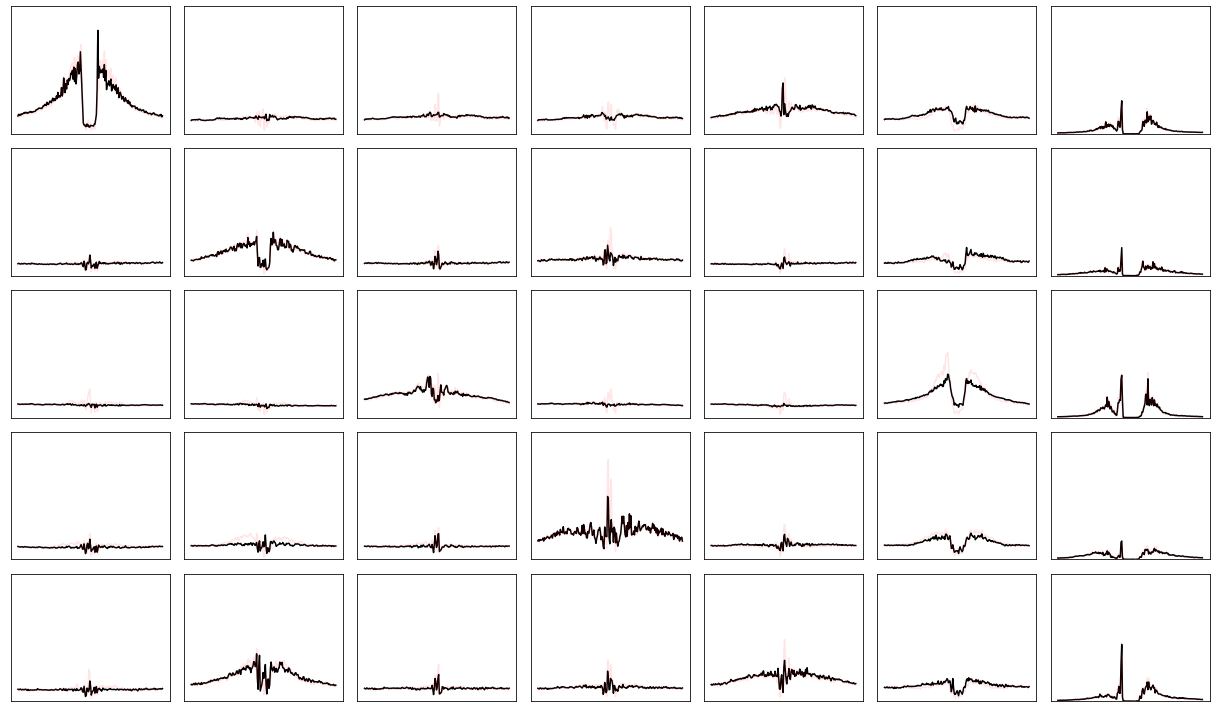

In [14]:
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, inset_axes 
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
import matplotlib

matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42 

fig,axs = plt.subplots(5,7,figsize=(17,10),sharey=False,sharex='col')

for i in range(5):
    for j in range(7):
        axs[i,j].plot(corrected[i][j][400:600], c='black')
        axs[i,j].plot(uncorrected[i][j][400:600], c='red', alpha=0.1)
        if j != 6:
            axs[i,j].set_ylim((0,0.01))
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])
        else:
            axs[i,j].set_ylim((0,0.1))
            axs[i,j].set_xticks([])
            axs[i,j].set_yticks([])

fig.tight_layout()
        
plt.savefig("poster_plot_marginal_footprints_dnase.pdf", dpi=300, transparent=True)
